# Training YOLO with Ultralytics pipeline

In [48]:
from ultralytics import YOLO
import os, sys
from tqdm.notebook import tqdm
import ultralytics

ultralytics.checks()

import torch
import math

# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

%matplotlib inline

assert sys.version_info >= (3, 8), "Python 3.8  is required."
%load_ext lab_black

Ultralytics YOLOv8.0.120 🚀 Python-3.8.16 torch-2.0.1 CPU
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 405.0/926.4 GB disk)


True
True
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<IPython.core.display.Javascript object>

In [2]:
# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)

# # If using MPS on Apple Silicon
# if torch.backends.mps.is_built():
#     mps_device = torch.device("mps")
#     model.to(mps_device)

# # OPTIONAL for memory errors
# # Set the value of PYTORCH_MPS_HIGH_WATERMARK_RATIO
# os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] =  "0.3"

## Train

In [3]:
import wandb
wandb.init(project="MITFisheryHerring",notes="MIT Fishery robo analytics Outputs per training example: 2 Blur: Up to 4px. Now added ~50 more images. Also training on yolov8m vs yolov8n")

AttributeError: module 'wandb' has no attribute 'init'

In [ ]:
# Use the model
results = model.train(data='river_herring.yaml', epochs=15,dropout=0.4,device='mps')  # can also try mps

New https://pypi.org/project/ultralytics/8.0.120 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=river_herring.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

RuntimeError: Dataset 'river_herring.yaml' error ❌ river_herring.yaml 'val:' key missing ❌.
'train' and 'val' are required in all data YAMLs.

In [5]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITRiverHerringTemp2/valid/labels.cache... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:26<00:00,  4.49s/it]
                   all         94        112      0.925      0.964      0.967      0.683
Speed: 5.9ms preprocess, 256.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val13


array([    0.68346])

In [6]:
# from ultralytics.yolo.utils.benchmarks import benchmark

# # Benchmark on GPU
# benchmark(model=model, imgsz=640, half=False, device='cpu')

### Export Model

In [10]:
# Export the model
model.export(format='saved_model')

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS

PyTorch: starting from runs/detect/train38/weights/best.pt with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 5, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: simplifying with onnxsim 0.4.31...


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 1.7s, saved as runs/detect/train38/weights/best.onnx (11.6 MB)

TensorFlow SavedModel: running 'onnx2tf -i runs/detect/train38/weights/best.onnx -o runs/detect/train38/weights/best_saved_model -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 14.6s, saved as runs/detect/train38/weights/best_saved_model (29.2 MB)

Export complete (15.7s)
Results saved to /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train38/weights
Predict:         yolo predict task=detect model=runs/detect/train38/weights/best_saved_model imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train38/weights/best_saved_model imgsz=640 data=river_herring.yaml 
Visualize:       https://netron.app


'runs/detect/train38/weights/best_saved_model'

### Load Model

In [5]:
## Record of models:
## 
# 'runs/detect/train36/weights/best_saved_model' Wandb:  https://wandb.ai/aus10powell/MITFisheryHerring/runs/txn0c9x3
from ultralytics import YOLO
model_best = YOLO( "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train196/weights/best.pt") 

In [6]:
display(model_best.val(split='val'))
print("*"*50)
display(model_best.val(split='test',device='mps'))

Ultralytics YOLOv8.0.139 🚀 Python-3.11.3 torch-2.1.0.dev20230515 CPU (Apple M2 Pro)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/IRWARiverHerringv2i/valid/labels.cache... 474 images, 2 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]
                   all        474        579      0.974      0.974      0.982      0.719
Speed: 0.3ms preprocess, 139.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val50


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x345088610>
fitness: 0.7457419319105141
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.71947])
names: {0: 'river_herring'}
plot: True
results_dict: {'metrics/precision(B)': 0.9736492793997796, 'metrics/recall(B)': 0.9740932642487047, 'metrics/mAP50(B)': 0.98221444099014, 'metrics/mAP50-95(B)': 0.7194672086794445, 'fitness': 0.7457419319105141}
save_dir: PosixPath('runs/detect/val50')
speed: {'preprocess': 0.33781598891889997, 'inference': 139.69157768201222, 'loss': 3.2191538106540084e-05, 'postprocess': 0.28059552993452497}

Ultralytics YOLOv8.0.139 🚀 Python-3.11.3 torch-2.1.0.dev20230515 CPU (Apple M2 Pro)


**************************************************


val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/IRWARiverHerringv2i/test/labels.cache... 262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 262/262 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.22s/it]
                   all        262        306      0.982      0.954      0.984      0.702
Speed: 0.4ms preprocess, 141.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val51


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x327a91410>
fitness: 0.7297670734656375
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.70156])
names: {0: 'river_herring'}
plot: True
results_dict: {'metrics/precision(B)': 0.9821123084705415, 'metrics/recall(B)': 0.954248366013072, 'metrics/mAP50(B)': 0.9836016433649933, 'metrics/mAP50-95(B)': 0.701563232365709, 'fitness': 0.7297670734656375}
save_dir: PosixPath('runs/detect/val51')
speed: {'preprocess': 0.3605880810104254, 'inference': 141.7376057792256, 'loss': 3.7309777645664366e-05, 'postprocess': 0.2867593110062694}


image 1/1 /Users/aus10powell/Downloads/RiverHerring/River Herring IRWA/1_2016-04-23_16-06-05_large.jpg: 480x640 2 river_herrings, 52.2ms
Speed: 1.5ms preprocess, 52.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


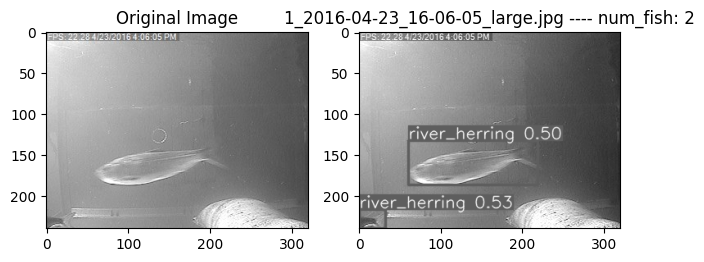

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2



herring_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Johne RIver Wapping Rd Dam/vlcsnap-2016-12-20-11h40m56s911.jpg'
white_sucker_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Underwater fish Jones River/WhiteSuckerWapping (6).JPG'
small_image = '/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 (Large+annotations)/IRWA Small Jpgs/Batch 1/2_2017-04-14_19-03-04.jpg'
v2_test_image = '/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryHerringv2/test/images/1_2016-04-21_21-50-1804298_jpg.rf.011911b9c681d5b4af70a308cdd98b93.jpg' # 2 fish
v2_valid_image = '/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryHerringv2/valid/images/1_2016-04-21_21-50-1803927_jpg.rf.6b36f83367e966f41544ba7e229f4d05.jpg'

random_example = "/Users/aus10powell/Downloads/RiverHerring/River Herring IRWA/1_2016-05-13_12-34-57_large.jpg"

#
v2_valid_imageb = "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITRiverHerring2w/valid/images/1_2016-04-21_21-50-1804987_jpg.rf.bd983d16bbaf541a0f08db030018a540.jpg"
v2_valid_imagec = "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITRiverHerring2w/valid/images/1_2016-04-21_21-50-1805011_jpg.rf.27d6d6392af4e7f3f8cac5c5bde0c0d1.jpg"

image = "/Users/aus10powell/Downloads/RiverHerring/River Herring IRWA/1_2016-04-23_16-06-05_large.jpg"

results = model_best(image)
title = image.split("/")[-1]
num_fish = len(results[0].boxes.data)

# Load and display the original image
original_image = cv2.imread(image)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")

# Generate and display the annotated frame
annotated_frame = results[0].plot()
gray = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title(title + f' ---- num_fish: {num_fish}')

plt.tight_layout()
plt.show()

### Images with biggest loss

## Tracking

In [13]:
# from ultralytics import YOLO

# model = model_best
# video_path = "/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4"
# results = model.track(
#     source=video_path,
#     tracker="/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/bytetrack.yaml",
#     show=True,
#    #stream=True #Uncomment to use r in results as loop
# )  # OPTIONAL: , tracker='custom_tracker.yaml'

### Experimenting

In [85]:
import os
import cv2
import numpy as np

# Directory path containing the JPEG images
directory = '/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/2018 Fish Sightings/2_2018-04-14_09-57-26.mp4'

# Initialize variables
widths = []
heights = []

# Iterate through the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        # Load the image
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)

        # Get the dimensions
        height, width, _ = image.shape

        # Append dimensions to the lists
        widths.append(width)
        heights.append(height)

# Convert lists to numpy arrays
widths = np.array(widths)
heights = np.array(heights)

# Calculate statistics
max_width = np.max(widths)
max_height = np.max(heights)
min_width = np.min(widths)
min_height = np.min(heights)
avg_width = np.mean(widths)
avg_height = np.mean(heights)
std_width = np.std(widths)
std_height = np.std(heights)

# Print the results
print(f"Maximum Width: {max_width}px")
print(f"Maximum Height: {max_height}px")
print(f"Minimum Width: {min_width}px")
print(f"Minimum Height: {min_height}px")
print(f"Average Width: {avg_width}px")
print(f"Average Height: {avg_height}px")
print(f"Standard Deviation of Widths: {std_width:.2f}px")
print(f"Standard Deviation of Heights: {std_height:.2f}px")


Maximum Width: 320px
Maximum Height: 240px
Minimum Width: 320px
Minimum Height: 240px
Average Width: 320.0px
Average Height: 240.0px
Standard Deviation of Widths: 0.00px
Standard Deviation of Heights: 0.00px


In [4]:
## Get frame size of single video


import cv2

def get_frame_size(mp4_file):
    cap = cv2.VideoCapture(mp4_file)
    if not cap.isOpened():
        raise ValueError(f"Error opening video file: {mp4_file}")

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    cap.release()

    return (frame_width, frame_height)

# Example usage
mp4_file = '/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/2018 Fish Sightings/2_2018-04-14_09-57-26.mp4'
frame_width, frame_height = get_frame_size(mp4_file)

print(f"Frame width: {frame_width}")
print(f"Frame height: {frame_height}")


Frame width: 640
Frame height: 480


### Video Gold Standard Count Verification

In [1]:
%%capture
import glob
import os
PROJECT_DIR = os.path.join(
    "/", "Users", "aus10powell", "Documents", "Projects", "MIT-Fishery-Counter"
)
DATA_DIR = os.path.join(PROJECT_DIR, "data")
GOLD_DIR = os.path.join(DATA_DIR, "gold_dataset")
mp4_files = glob.glob(os.path.join(GOLD_DIR, "videos") + "/*.mp4")
#[f.split("/")[-1].split(".")[0] for f in mp4_files]


from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from main_inference import main

import cv2
import time
from ultralytics import YOLO
import supervision as sv
import numpy as np
import json
import io
import time
import logging
import os
from tqdm import tqdm
import resource

site = "IRWA"

# True data


data = [
    {"file": "2_2018-05-10_06-39-30", "true_herring_counts": 4},
    {"file": "2_2018-04-14_10-06-19","true_herring_counts": 1 },
    {"file": "2_2018-04-14_13-18-51", "true_herring_counts": 1},
    {"file": "2_2018-04-28_10-54-38", "true_herring_counts": 3},
    {"file": "2_2017-06-04_06-09-56", "true_herring_counts": 0}, # Comes from left returns right
    {"file": "2_2017-04-15_11-23-36", "true_herring_counts": 1},
    {"file": "2_2017-04-13_14-10-29", "true_herring_counts": 1},  # 2_2017-04-13_13-10-00
    {"file": "2_2017-04-13_13-10-00", "true_herring_counts": 1}, # 2_2018-04-14_17-12-42
    {"file": "2_2018-04-14_17-12-42", "true_herring_counts": 1}, # 2_2018-04-27_13-07-38
    {"file": "2_2018-04-27_13-07-38", "true_herring_counts": 1}, # 2_2018-04-27_15-23-03
    {"file": "2_2018-04-27_15-23-03", "true_herring_counts": 3}, 
    {"file": "2_2018-04-29_08-28-10", "true_herring_counts": 1},
    {"file": "2_2018-04-29_09-14-03", "true_herring_counts": 1},
    {"file": "2_2018-04-29_16-28-35", "true_herring_counts": 2},
    {"file": "2_2018-04-29_15-55-24", "true_herring_counts": 2},
    {"file": "2_2018-04-28_11-25-56", "true_herring_counts": 2},
   {"file": "2_2018-04-29_15-39-37", "true_herring_counts": 3},
    {"file": "2_2018-04-29_16-54-05", "true_herring_counts": 1}, 
    {"file": "2_2018-05-04_11-32-10", "true_herring_counts": 1}, 
]

pred_net_counts = []
true_net_counts = []
total_duration_seconds = []
for idx in tqdm(range(len(data))):
    video_path = [path for path in mp4_files if data[idx]["file"] in path][0]
    print(video_path)
    frame_rate, annotated_frames, out_count, in_count,duration_seconds,_ = main(
        video_path=video_path,device='mps'            
    )
    pred_net_counts.append(out_count-in_count)
    true_net_counts.append(data[idx]["true_herring_counts"])
    total_duration_seconds.append(duration_seconds)



In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
def calculate_confidence_interval(count_data, confidence_level=0.95):
    # Calculate the mean and standard deviation of the count data
    mean = np.mean(count_data)
    std = np.std(count_data)

    # Calculate the confidence interval using the t-distribution
    n = len(count_data)
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_value * std / np.sqrt(n)
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)

    return confidence_interval

def MAPE(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between the true values and predicted values.
    
    Parameters:
        y_true (array-like): Array or list of true values.
        y_pred (array-like): Array or list of predicted values.

    Returns:
        float: The calculated MAPE value.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Avoid division by zero
    epsilon = 1e-10

    total_percentage_error = 0
    total_samples = len(y_true)

    for i in range(total_samples):
        # Calculate the absolute percentage error for each data point
        if y_true[i] == 0:
            absolute_percentage_error = np.abs((y_true[i] - y_pred[i]))
        else:
            absolute_percentage_error = np.abs((y_true[i] - y_pred[i]) / (y_true[i] + epsilon))

        # Add it to the total percentage error
        total_percentage_error += absolute_percentage_error

    # Calculate the mean of the absolute percentage errors
    mape = (total_percentage_error / total_samples) * 100.0

    return mape

df_results = pd.DataFrame(data={"pred_net_counts":pred_net_counts,"true_net_counts":true_net_counts},)

In [ ]:
print(f"Total video processed: {sum(total_duration_seconds)} (sec), {sum(total_duration_seconds)/60:.1f} (min)")
print(f"Total number of videos process: {len(data)}")

diffs = [np.abs(x - y) for x, y in zip(true_net_counts, pred_net_counts)]
print(f"Did not count {sum(diffs)} out of {sum(true_net_counts)} herring")
print(f"MAE (Mean Absolute Error e.g. counts): {mean_absolute_error(y_pred=pred_net_counts,y_true = true_net_counts):.2f}",)
print(f"MAPE (Mean Absolute Percentage Error of Counts): {MAPE(true_net_counts,pred_net_counts):.1f}%",)

print(f"Average number of missed counts per second {sum(diffs)/sum(total_duration_seconds):.2f}")



absolute_error = np.abs(df_results["pred_net_counts"] - df_results["true_net_counts"]).values
std_absolute_error = np.std(absolute_error)
ci = calculate_confidence_interval(count_data=diffs)
print(f"Estimates off between {ci[0]:.1f} and {ci[1]:.1f} fish at an average of {np.mean(diffs):.1f} per video")

# Bootstrapped

def bootstrap_mean_ci(data, num_iterations=10000, ci_level=0.95):
    # Create an array to store bootstrapped means
    bootstrapped_means = np.empty(num_iterations)

    # Perform bootstrapping
    for i in range(num_iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means[i] = np.mean(bootstrap_sample)

    # Calculate confidence interval
    lower_ci = np.percentile(bootstrapped_means, (1 - ci_level) * 100 / 2)
    upper_ci = np.percentile(bootstrapped_means, ci_level * 100 + (1 - ci_level) * 100 / 2)

    return np.mean(bootstrapped_means), lower_ci, upper_ci

# # Example usage
# mean, lower_ci, upper_ci = bootstrap_mean_ci(diffs)

# print(f"Bootstrapped mean: {mean:.2f}")
# print(f"Bootstrapped CI of how many counts on average the model is off: [{lower_ci:.2f}, {upper_ci:.2f}]")

Total video processed: 259.63 (sec), 4.3 (min)
Total number of videos process: 19
Did not count 11 out of 30 herring
MAE (Mean Absolute Error e.g. counts): 0.58
MAPE (Mean Absolute Percentage Error of Counts): 28.5%
Average number of missed counts per second 0.04
Estimates off between 0.1 and 1.0 fish at an average of 0.6 per video


In [ ]:
"""
# /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train196/weights/last.pt

Total video processed: 259.63 (sec), 4.3 (min)
Total number of videos process: 19
Did not count 11 out of 30 herring
MAE (Mean Absolute Error e.g. counts): 0.58
MAPE (Mean Absolute Percentage Error of Counts): 28.5%
"""

### Run Benchmark

In [2]:
from ultralytics.utils.benchmarks import benchmark
benchmark(model='/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train184/weights/best.pt', data='river_herring.yaml', imgsz=(320,240), half=False, device='mps')

Ultralytics YOLOv8.0.139 🚀 Python-3.11.3 torch-2.1.0.dev20230515 MPS (Apple M2 Pro)
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 444.7/926.4 GB disk)

Benchmarks complete for best.pt on river_herring.yaml at imgsz=(320, 240) (184.25s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅       21.5               0.6365                   12.01
1             TorchScript       ❎       42.8                  NaN                     NaN
2                    ONNX       ❎       42.5                  NaN                     NaN
3                OpenVINO       ❎       42.7                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❎      106.4                  NaN                     NaN
7     TensorFlow GraphDef       ❎       42.6      

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,21.5,0.6365,12.01
1,TorchScript,❎,42.8,NaN,NaN
2,ONNX,❎,42.5,NaN,NaN
3,OpenVINO,❎,42.7,NaN,NaN
4,TensorRT,❌,0.0,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,❎,106.4,NaN,NaN
7,TensorFlow GraphDef,❎,42.6,NaN,NaN
8,TensorFlow Lite,❎,42.5,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
